In [18]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from VQPCASuite.clustering import *
from VQPCASuite.evaluation import *
from VQPCASuite.preprocess import *

# Set times new roman as default
plt.rcParams['font.family'] = 'Times New Roman'

Index(['T', 'H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'N2', 'AR',
       'HE'],
      dtype='object', name=0)


Text(0, 0.5, 'T [K]')

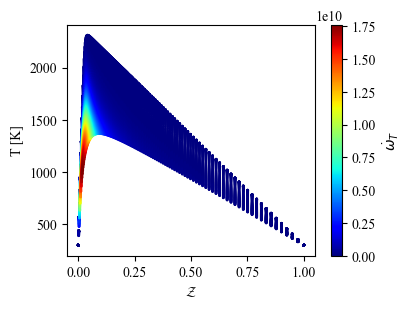

In [19]:
# Import flamalet data and plot mixture fraction vs temperature

# Load the hydrogen flamelet dataset
# Import the flamelet dataset
path_to_files = '/Users/matteosavarese/Desktop/Dottorato/Datasets/hydrogen-air-flamelet/'
filename = 'STEADY-clustered-flamelet-H2-'
# Import state space
state_space = pd.read_csv(path_to_files + filename + 'state-space.csv', header=None)
# Import state space sources
state_space_sources = pd.read_csv(path_to_files + filename + 'state-space-sources.csv', header=None)
# Import mixture fraction
mixture_fraction = pd.read_csv(path_to_files + filename + 'mixture-fraction.csv', header=None)
# Import heat release rate
heat_release_rate = pd.read_csv(path_to_files + filename + 'heat-release-rate.csv', header=None)
# Import dissipation rate 
dissipation_rates = pd.read_csv(path_to_files + filename + 'dissipation-rates.csv', header=None)
# Import state space names as a list of strings
state_space_names = pd.read_csv(path_to_files + filename + 'state-space-names.csv', header=None)
# Assign column names to the dataframes
state_space.columns = state_space_names.iloc[:,0]
state_space.head()
# Assign column names to the sources dataframe
state_space_sources.columns = state_space_names.iloc[:,0]

# Print column names
print(state_space.columns)

# ------------ Plot mixture fraction vs temperature colored by heat release rate ----------- #
fig, ax = plt.subplots(figsize=(4,3))
sc = ax.scatter(mixture_fraction, state_space.values[:,0], s=1, c=heat_release_rate.values, cmap='jet')
cb = fig.colorbar(sc, ax=ax)
cb.set_label('$\dot{\omega}_T$')
ax.set_xlabel('$\mathcal{Z}$')
ax.set_ylabel('T [K]')

In [20]:
# ------------ Data pre-processing ------------ #

# Select scaling method
method = 'auto'

# Initialize scaler
scaler = Scaler(method=method)

# Scale and center data
X_scaled = scaler.fit_transform(state_space.values)

In [21]:
# ----------- Setup parametric analysis ---------- #
qspan = [0.90, 0.95, 0.99, 0.999]
kspan = [2, 3, 4, 5, 6, 7]

# Initialize metric values
metric = np.zeros((len(qspan), len(kspan)))

for i in range(len(qspan)):
    for j in range(len(kspan)):

        # Initialize vqpca object
        model = vqpca(X_scaled, stopping_rule="variance")

        # Fit the model
        labels, model = model.fit(k=kspan[j], q=kspan[i], verbose=False)

        # Evaluate the solution
        index = evaluate(X_scaled, labels, q=qspan[i])
        metric[i,j] = index


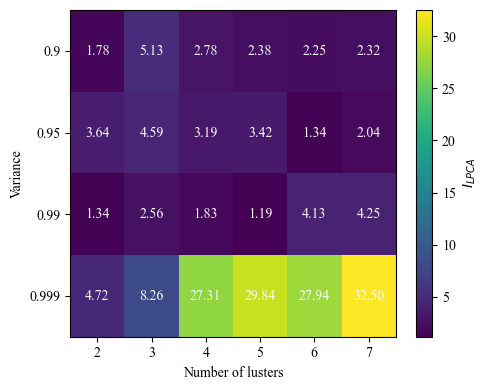

In [22]:
# ------------- Plot results ----------- #
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(metric, aspect='auto')
# Loop over data dimensions and create text annotations
for i in range(len(qspan)):
    for j in range(len(kspan)):
        plt.text(j, i, f'{metric[i, j]:.2f}', ha='center', va='center', color='white')

cb = fig.colorbar(im)
cb.set_label("$I_{LPCA}$")
# Set the tick labels
ax.set_xticks(ticks=np.arange(len(kspan)), labels=kspan)
ax.set_yticks(ticks=np.arange(len(qspan)), labels=qspan)
# Set axis labels
ax.set_xlabel("Number of lusters")
ax.set_ylabel("Variance")
fig.tight_layout()